In [1]:
import warnings
warnings.filterwarnings("ignore")   

In [2]:
### Importing Libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Data Description

* The data set contains the IPL data.
* It contains two data set which are match and deleveries.
* It contains batsman data, bowler data, team and venue data.
* The data set contains a unique identfier for each player and match.

# Objective

* Analysing the performance of a batsman by bar plot
* Finding most no of matches  played at which city and which stadium
* finding no of matches played by each team and no of matches won by each team
* win percentage of each team

# Reading the data

In [3]:
## Importing required data set using pandas
# current working directory
os.getcwd()

'C:\\Users\\user\\Downloads'

In [4]:
## set the current working directory
os.chdir('C:\\Users\\user\\Desktop\\ml')   

In [5]:
match = pd.read_csv("data sheet\\matches.csv")
ball = pd.read_csv("data sheet\\deliveries.csv")

In [6]:
match.head()   

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
ball.head()  

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# problem statement

* Analysing the performance of batsman RG Sharma and his performance can be evaluated from run
* we can analyse it from ball data
* Analysing the ipl data and finding most of matches  played at which city and which stadium

In [8]:
ball.batsman.unique()   ## shows the batsman 

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [9]:
len(ball.batsman.unique())   ## count the no of batsman

516

In [10]:
## batting data of rg sharma
rohit = ball[ball.batsman == "RG Sharma"]   
rohit.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
275,2,1,Mumbai Indians,Rising Pune Supergiant,5,3,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
276,2,1,Mumbai Indians,Rising Pune Supergiant,5,4,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
278,2,1,Mumbai Indians,Rising Pune Supergiant,5,6,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
279,2,1,Mumbai Indians,Rising Pune Supergiant,6,1,RG Sharma,JC Buttler,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
285,2,1,Mumbai Indians,Rising Pune Supergiant,7,1,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [11]:
## runs made by rg sharma excluding extra runs ie only batsman run
sum(rohit.batsman_runs)

4914

In [12]:
## reset index of rohit , because it holds the index of previous data set
rohit.reset_index(inplace = True, drop = True)
rohit

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2,1,Mumbai Indians,Rising Pune Supergiant,5,3,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2,1,Mumbai Indians,Rising Pune Supergiant,5,4,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2,2,1,Mumbai Indians,Rising Pune Supergiant,5,6,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
3,2,1,Mumbai Indians,Rising Pune Supergiant,6,1,RG Sharma,JC Buttler,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4,2,1,Mumbai Indians,Rising Pune Supergiant,7,1,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,11415,1,Mumbai Indians,Chennai Super Kings,4,5,RG Sharma,Q de Kock,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3812,11415,1,Mumbai Indians,Chennai Super Kings,4,6,RG Sharma,Q de Kock,Harbhajan Singh,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3813,11415,1,Mumbai Indians,Chennai Super Kings,5,2,RG Sharma,Q de Kock,SN Thakur,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
3814,11415,1,Mumbai Indians,Chennai Super Kings,6,1,RG Sharma,AS Yadav,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [13]:
## batting average
#  for finding avg run per match we have to find how many matches he played
len(rohit.match_id.unique())  # find no matches played

182

In [14]:
avg = sum(rohit.batsman_runs)/len(rohit.match_id.unique())
print("avg of rohit", avg)

avg of rohit 27.0


* want to see performance of rg sharma every year visually by plot 
* want to group every run by season
* run and seasson are not in same data set so we have to take it from match.csv and save season data in a new variable ie rohit   match list

In [15]:
rohitm_list = rohit.match_id.unique() # list of matches rohit  played
rohitm_list

array([    2,     7,    10,    12,    16,    24,    28,    34,    37,
          44,    47,    50,    53,    56,    58,    59,    64,    66,
          68,    77,    80,    85,    89,    92,    98,   102,   108,
         111,   121,   124,   128,   131,   136,   140,   144,   147,
         151,   155,   158,   163,   164,   171,   172,   174,   175,
         179,   186,   189,   195,   199,   204,   207,   210,   214,
         216,   220,   225,   229,   232,   233,   238,   254,   257,
         260,   267,   273,   277,   282,   287,   292,   299,   303,
         306,   308,   310,   316,   319,   327,   336,   340,   342,
         346,   351,   355,   360,   363,   367,   370,   379,   383,
         386,   390,   395,   403,   408,   413,   417,   421,   423,
         430,   434,   439,   444,   447,   450,   454,   456,   457,
         458,   462,   470,   473,   477,   479,   484,   490,   493,
         497,   501,   505,   508,   513,   515,   518,   524,   526,
         530,   534,

In [16]:
 ##  matches played by rohit
rohit_match = match[match.id.isin(rohitm_list)] 
rohit_match   

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould


.

Checking runs of each match played by rohit using for loop 

In [17]:
runs_ls = []   # creating a null variable to store data

In [18]:
for m in rohitm_list:
    temp_df = rohit[rohit.match_id == m]   # temp data frame 
    runs_scored = sum(temp_df.batsman_runs)  # adding the runs and storing in temp_df
    runs_ls.append(runs_scored)

In [19]:
runs_ls    ### runs list for matches rohit played


[3,
 2,
 4,
 0,
 40,
 5,
 58,
 5,
 56,
 10,
 67,
 5,
 27,
 1,
 26,
 24,
 0,
 66,
 36,
 76,
 17,
 23,
 5,
 33,
 35,
 6,
 50,
 57,
 36,
 52,
 3,
 18,
 17,
 38,
 21,
 38,
 9,
 9,
 6,
 32,
 42,
 12,
 5,
 24,
 13,
 19,
 1,
 45,
 49,
 45,
 2,
 11,
 73,
 6,
 8,
 51,
 68,
 11,
 2,
 0,
 27,
 20,
 87,
 56,
 13,
 18,
 12,
 49,
 5,
 4,
 58,
 10,
 13,
 0,
 1,
 73,
 21,
 29,
 2,
 50,
 12,
 42,
 3,
 60,
 0,
 109,
 5,
 12,
 14,
 11,
 8,
 74,
 62,
 2,
 73,
 34,
 10,
 79,
 22,
 39,
 16,
 37,
 20,
 14,
 25,
 8,
 2,
 2,
 27,
 2,
 50,
 4,
 1,
 39,
 59,
 19,
 14,
 51,
 40,
 18,
 30,
 16,
 20,
 98,
 0,
 0,
 50,
 42,
 30,
 24,
 27,
 26,
 46,
 18,
 15,
 30,
 7,
 19,
 50,
 7,
 84,
 7,
 5,
 62,
 65,
 0,
 68,
 85,
 5,
 25,
 15,
 31,
 30,
 16,
 11,
 19,
 97,
 0,
 2,
 59,
 0,
 24,
 11,
 38,
 0,
 6,
 14,
 14,
 48,
 32,
 14,
 11,
 47,
 29,
 31,
 5,
 67,
 12,
 25,
 56,
 4,
 15]

In [20]:
## adding a column named "runs"  ie the runs per match
rohit_match["runs"] = runs_ls

In [21]:
rohit_match  # 'runs' column added


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,runs
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,3
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,2
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,4
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN,0
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar,12
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore,25
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,56
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,4


<AxesSubplot:xlabel='season'>

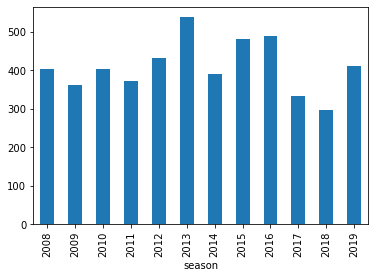

In [22]:
### bar plot for total run and season (plots using pandas)

rohit_match.groupby(['season'])['runs'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='season'>

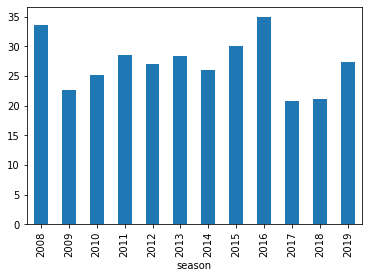

In [23]:
## avg score per year   (plots using pandas)

rohit_match.groupby(['season'])['runs'].mean().plot(kind = 'bar')

# Conclusion 1

At the start of the season he was doing good. After 2009 till 2014 the performance 
was decreasing. in 2015 and 2016 perfromance incerased but after that again decreased.

In [24]:
#  no of matches hosted by different stadiums and below the chart
match.venue.value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [26]:
## finding no of matches hosted by different stadiums ie venue and saving it in a variable venue
venue = match.venue.value_counts()   

<function matplotlib.pyplot.show(close=None, block=None)>

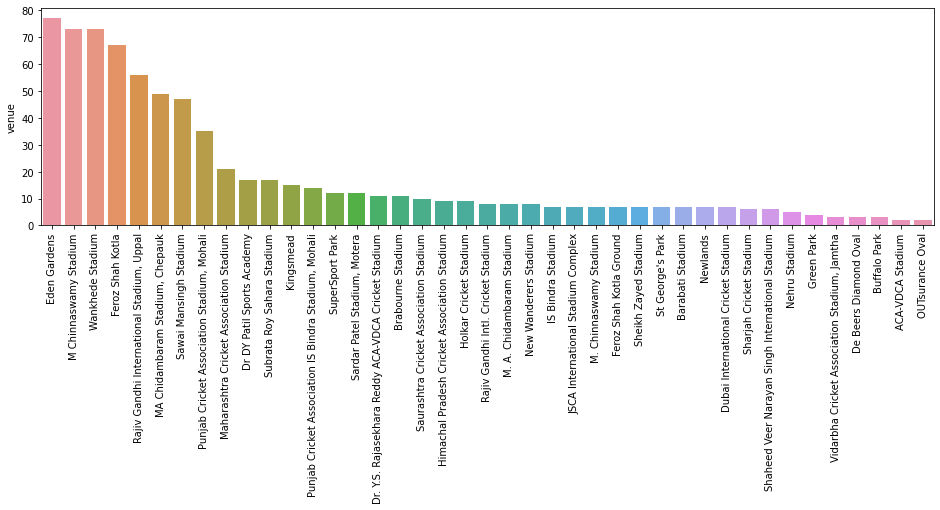

In [28]:
plt.figure(figsize = (16,4))  ### increase size of plot
sns.barplot(venue.index,venue)  ## bar plot
plt.xticks(rotation = 90)      ## rotating the x axis words
plt.show

In [30]:
city = match.city.value_counts()  ## finding no of matches hosted by different cities  and saving it in a variable city

<function matplotlib.pyplot.show(close=None, block=None)>

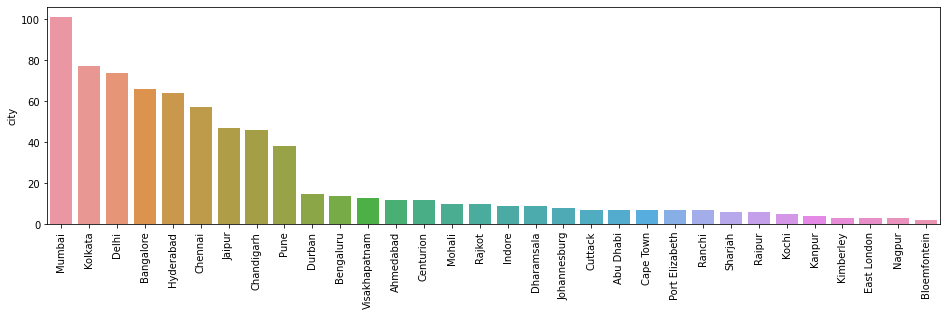

In [32]:
plt.figure(figsize = (16,4))   # increasing size of plot
sns.barplot(city.index,city)   # bar plot
plt.xticks(rotation = 90)       # rotating the x axis words
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

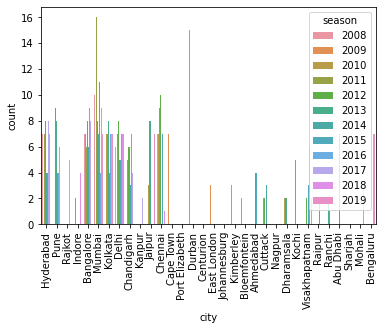

In [33]:
## add hue data season in it
sns.countplot(x = 'city', data = match, hue = 'season')
plt.xticks(rotation = 90)
plt.show

# Conclusion 2 

Most of the matches played in Mumbai city but most of matches  played at Eden Gardens stadium.
This shows there are more then one sadium in one city.

# Calculating the winning percentage of each team

In [34]:
## no of matches played by each team

## addin two columns team1 and team2

match_pl_tm = pd.concat([match['team1'],match['team2']])  
match_pl_tm = match_pl_tm.value_counts() ## no of matches played by each team and saving it in the same variable

match_pl_tm = match_pl_tm.reset_index()  ## resetting the index

match_pl_tm.columns = ['team','total matches']  ## changing the column names

match_pl_tm.sort_values(by = 'team', inplace=True) ## sorting by the no of matches played

match_pl_tm    ### printing the data frame

,team,total matches
4,Chennai Super Kings,164
8,Deccan Chargers,75
11,Delhi Capitals,16
5,Delhi Daredevils,161
10,Gujarat Lions,30
3,Kings XI Punjab,176
13,Kochi Tuskers Kerala,14
2,Kolkata Knight Riders,178
0,Mumbai Indians,187
9,Pune Warriors,46


In [35]:
## no of matches won by each team
matches_won = match.winner.value_counts()  # no of matches won and saving in avariable
matches_won = matches_won.reset_index()
matches_won.columns = ["team","won"]

matches_won.sort_values(by = "team", inplace = True)
matches_won


,team,won
1,Chennai Super Kings,100
8,Deccan Chargers,29
11,Delhi Capitals,10
6,Delhi Daredevils,67
9,Gujarat Lions,13
4,Kings XI Punjab,82
13,Kochi Tuskers Kerala,6
2,Kolkata Knight Riders,92
0,Mumbai Indians,109
10,Pune Warriors,12


Finding win percentage of each team  we have to add the two data set ie match_pl_tm and matches_won and create new data frame matchs_won_total

In [37]:
# win percentage of each team
matchs_won_total = matches_won  ## saving matches_won in a new variable matchs_won_total
matchs_won_total['total'] = match_pl_tm['total matches']  ## created a column 'total' which takes values from 'total matches'
matchs_won_total ### new data frame created

,team,won,total
1,Chennai Super Kings,100,180
8,Deccan Chargers,29,75
11,Delhi Capitals,10,16
6,Delhi Daredevils,67,147
9,Gujarat Lions,13,46
4,Kings XI Punjab,82,164
13,Kochi Tuskers Kerala,6,14
2,Kolkata Knight Riders,92,178
0,Mumbai Indians,109,187
10,Pune Warriors,12,30


In [39]:
### calculating win percentage of each team and adding 'percentage' column and plotting it in a figure
matchs_won_total["percentage"] = matchs_won_total['won'] / matchs_won_total['total']*100
matchs_won_total.sort_values(by = 'percentage', ascending = False)

,team,won,total,percentage
11,Delhi Capitals,10,16,62.500000
12,Rising Pune Supergiant,10,16,62.500000
0,Mumbai Indians,109,187,58.288770
1,Chennai Super Kings,100,180,55.555556
7,Sunrisers Hyderabad,58,108,53.703704
2,Kolkata Knight Riders,92,178,51.685393
4,Kings XI Punjab,82,164,50.000000
3,Royal Challengers Bangalore,84,176,47.727273
5,Rajasthan Royals,75,161,46.583851
6,Delhi Daredevils,67,147,45.578231


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1152x288 with 0 Axes>

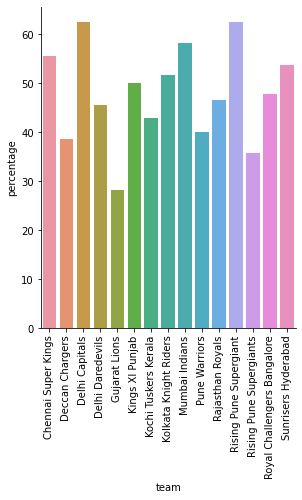

In [40]:
plt.figure(figsize = (16,4))  ### increase size of plot
sns.catplot(x = 'team', y = 'percentage', data = matchs_won_total, kind = "bar")    ## barplot
plt.xticks(rotation = 90)   ## rotating the x axis words
plt.show

The above figure shows the winning percentage of each team

# Conclusion 3

Delhi Capitals and Rising Pune Supergiant shares the heighest winning percentage of 62.50.
